In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
df['Embarked'] = df['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})
df.Embarked.unique()

array([ 0.,  1.,  2., nan])

In [ ]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})
df.Sex.unique()

array([0, 1])

In [ ]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['Cabin'] = df['Cabin'].fillna(method='ffill')
df['Cabin'] = pd.factorize(df['Cabin'])[0]
df.Cabin.unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(7), object(2)
memory usage: 83.7+ KB


In [ ]:
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   Embarked  889 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,2


In [ ]:
df.fillna(df.mean(),inplace=True)
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Cabin,0
Embarked,0


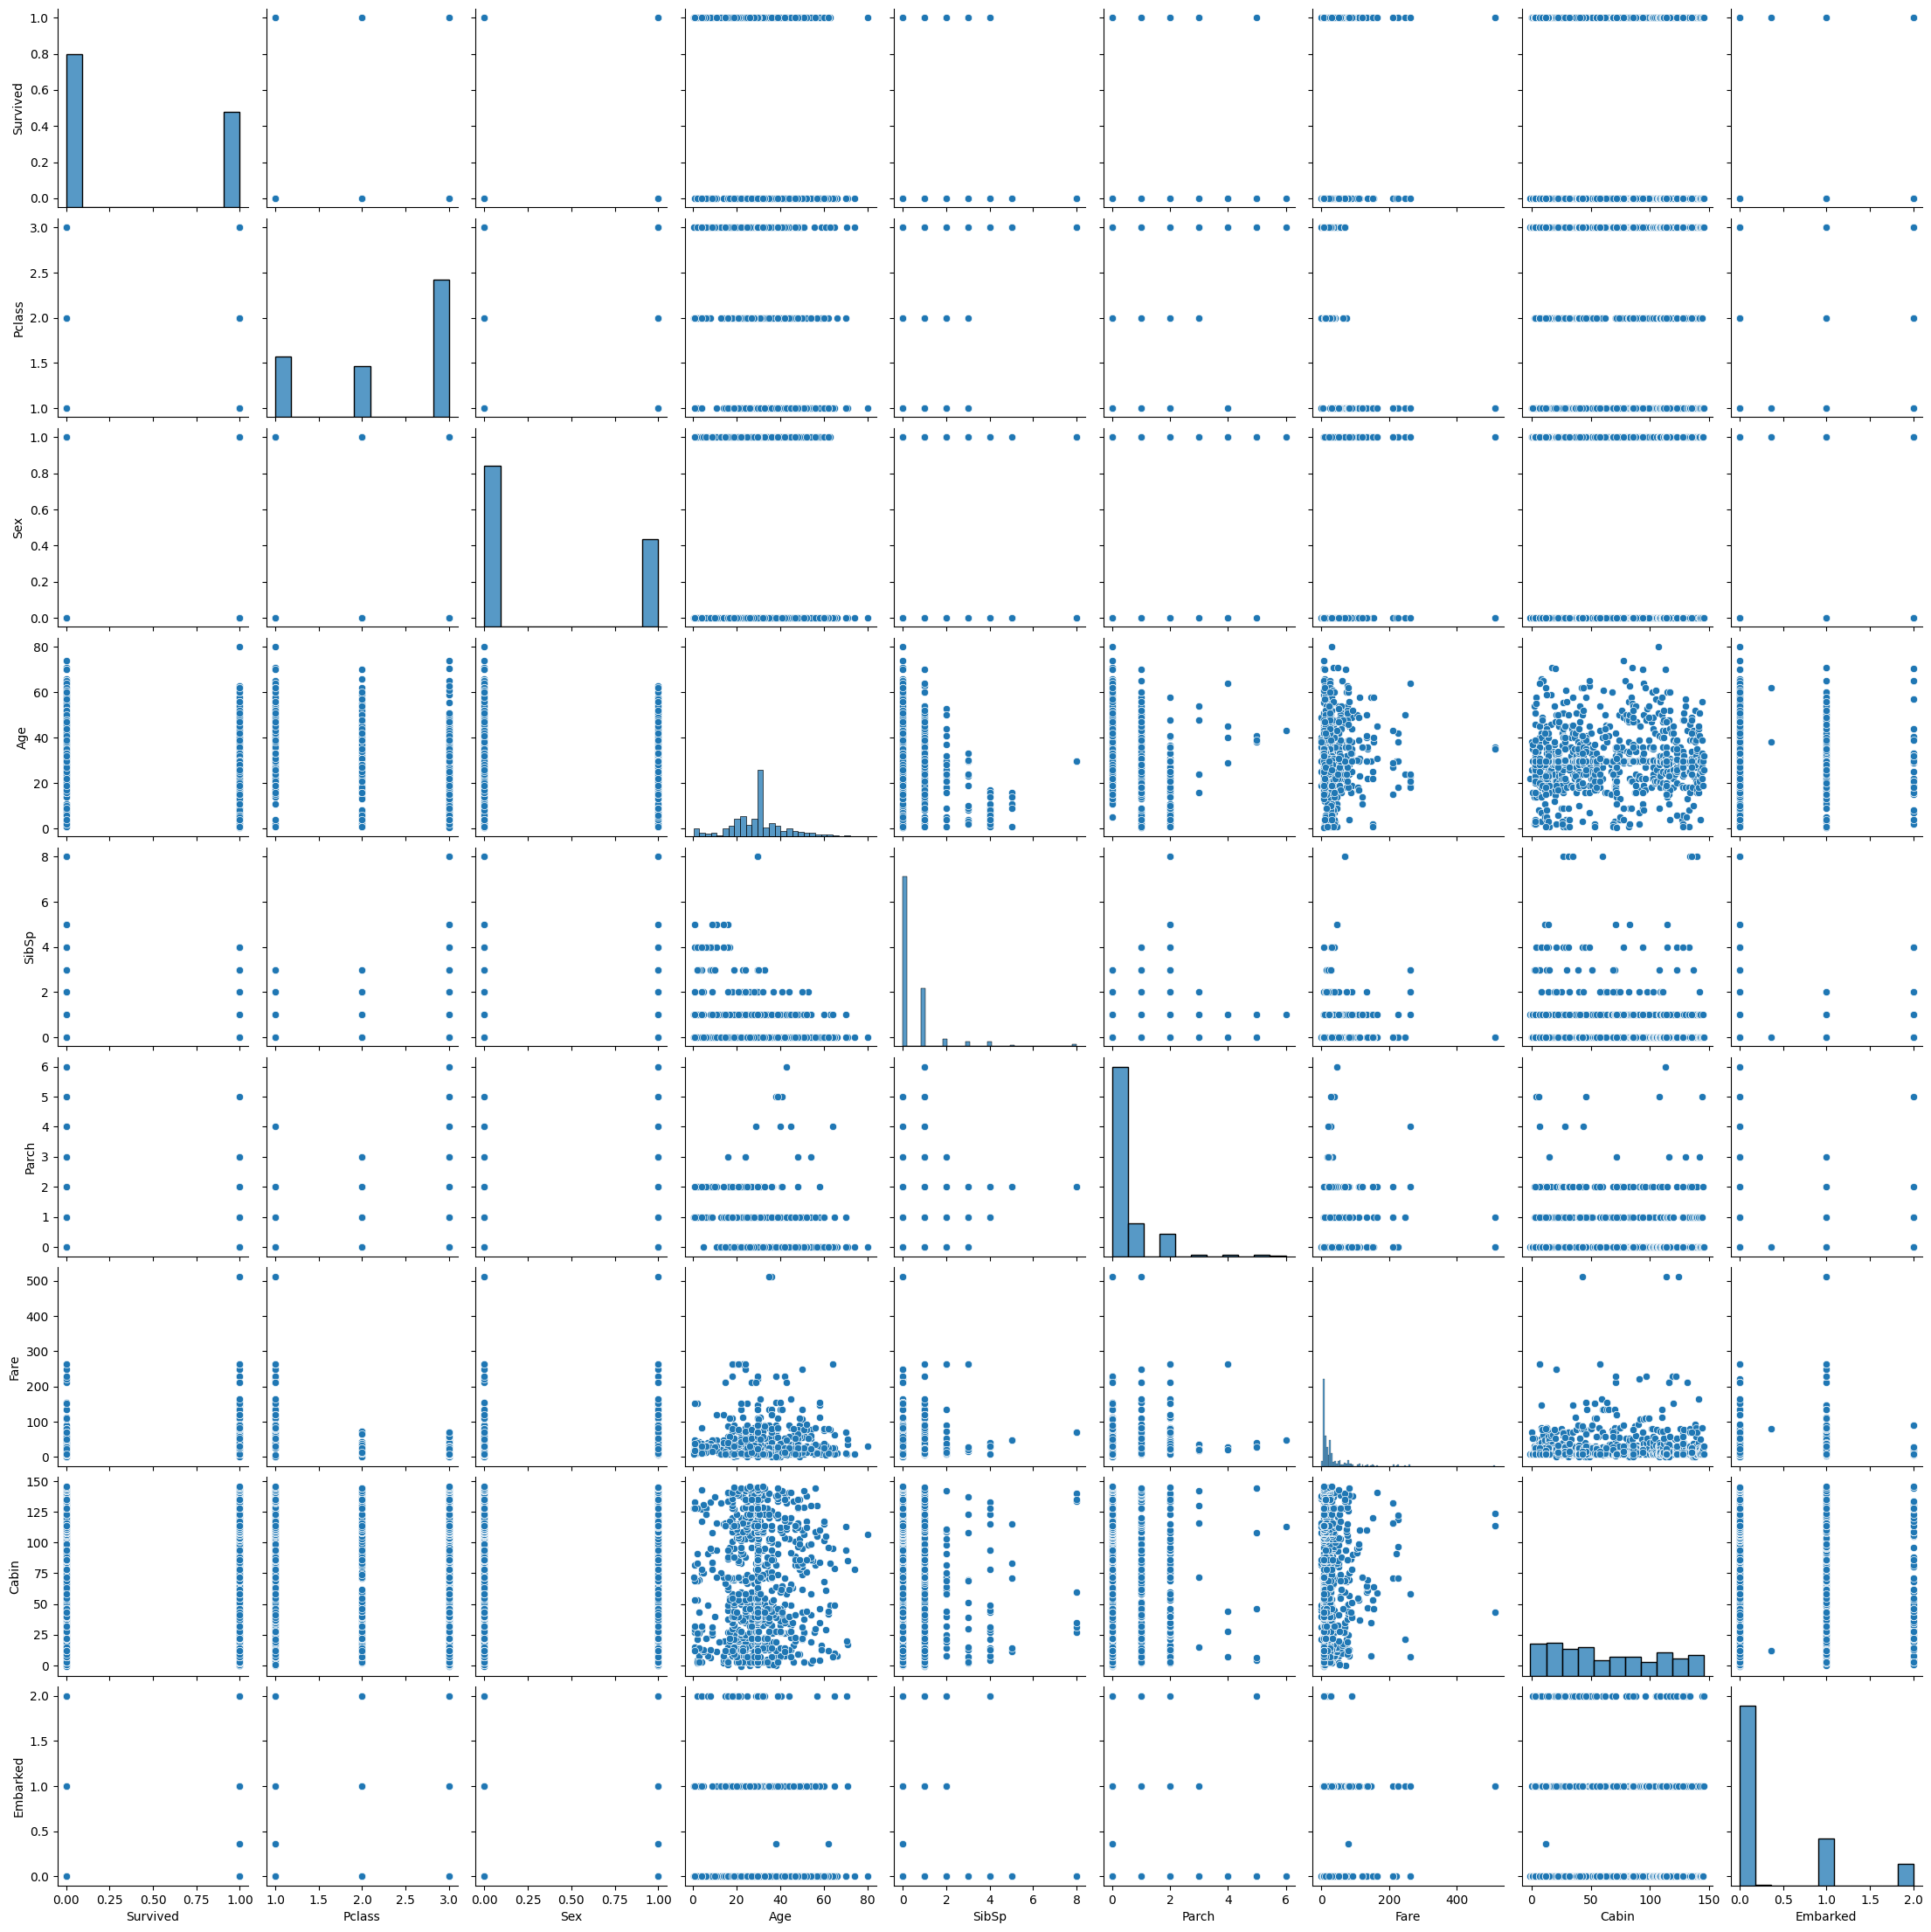

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,63.895623,0.362205
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,44.110221,0.635442
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,23.500000,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,55.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,104.500000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,146.000000,2.000000


In [ ]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


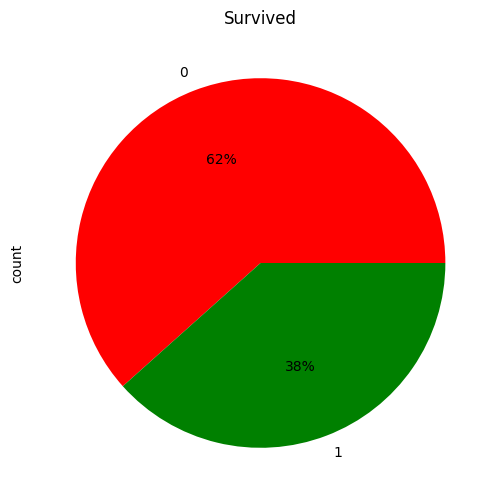

In [ ]:
ax=df.Survived.value_counts().plot(kind='pie', colors=['red','green'], autopct='%1.0f%%', figsize=(6,6))
plt.title('Survived')
plt.show()

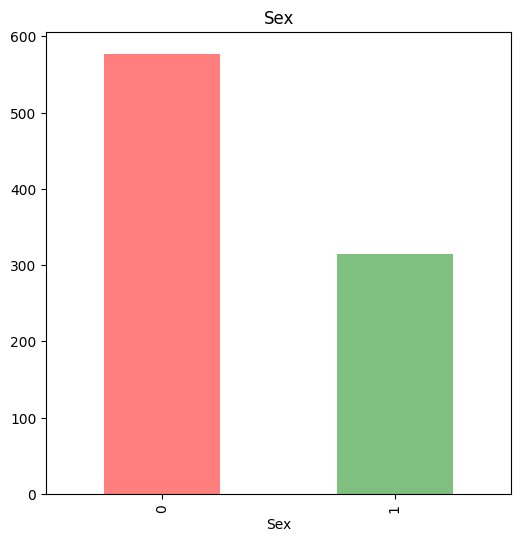

In [ ]:
ax=df.Sex.value_counts().plot(kind='bar', color=['red','green'], alpha = 0.5, figsize=(6,6))
plt.title('Sex')
plt.show()

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Cabin'}>,
        <Axes: title={'center': 'Embarked'}>]], dtype=object)

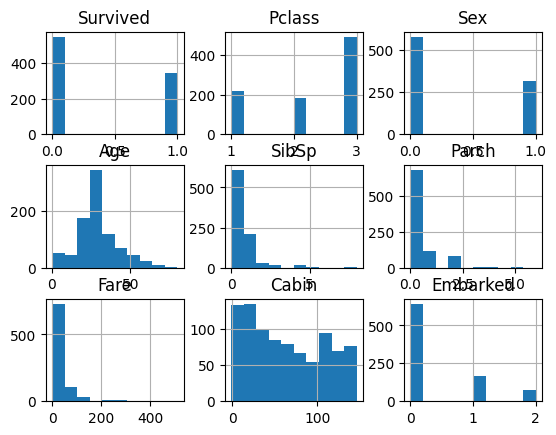

In [ ]:
df.hist()

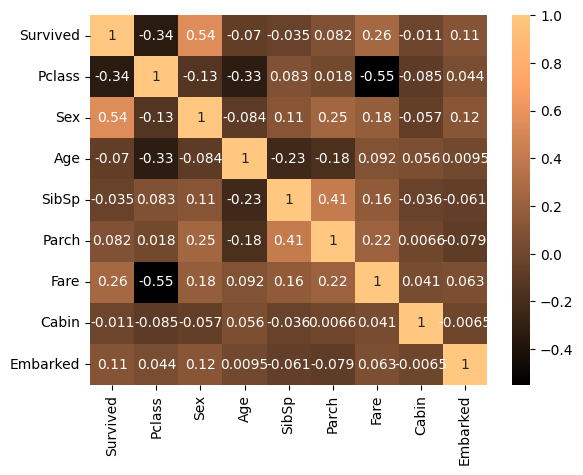

In [ ]:
sns.heatmap(df.corr(numeric_only=True),cmap='copper', annot=True)
plt.show()

In [ ]:
scaler = MinMaxScaler()
columns_to_normalize = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.352413,0.367921,0.065376,0.063599,0.062858,0.441467,0.181102
std,0.486592,0.418036,0.477990,0.163383,0.137843,0.134343,0.096995,0.300070,0.317721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015440,0.166667,0.000000
50%,0.000000,1.000000,0.000000,0.367921,0.000000,0.000000,0.028213,0.380952,0.000000
75%,1.000000,1.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.717687,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=97)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 8) (179, 8) (712,) (179,)


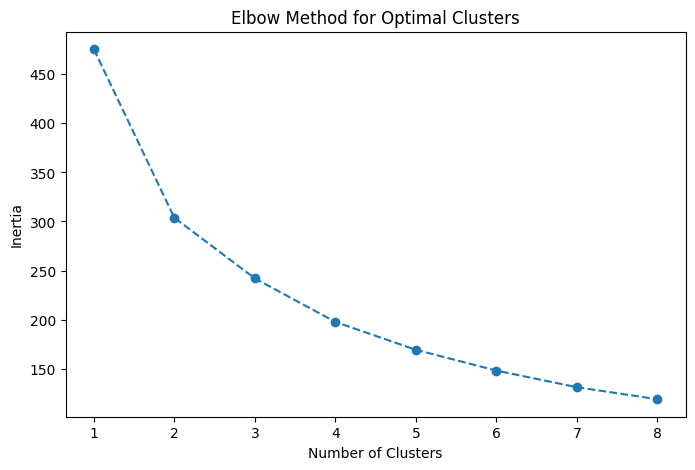

[475.5162970328514,
 303.76070131395267,
 241.96553255137007,
 197.61824960043376,
 169.24098865970177,
 148.02177378167573,
 131.0989982665218,
 118.8753947978112]

In [ ]:
inertia = []
cluster_range = range(1, 9)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, tol=1e-4, n_init=10, random_state=97)
    kmeans.fit(x_train)
    inertia.append(kmeans.inertia_)

# Plot the inertia to visualize the elbow point
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(cluster_range)
plt.show()
inertia

In [ ]:
kmeans = KMeans(n_clusters=8, tol=1e-4, n_init=10, random_state=97)
kmeans.fit(x_train)

y_pred = kmeans.predict(x_test)

def map_clusters_to_labels(y_true, y_pred):
    mapping = {}
    for cluster in np.unique(y_pred):
        mask = y_pred == cluster
        label = np.bincount(y_true[mask]).argmax()
        mapping[cluster] = label
    return np.array([mapping[cluster] for cluster in y_pred])

y_pred_mapped = map_clusters_to_labels(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred_mapped))

Accuracy: 0.7932960893854749


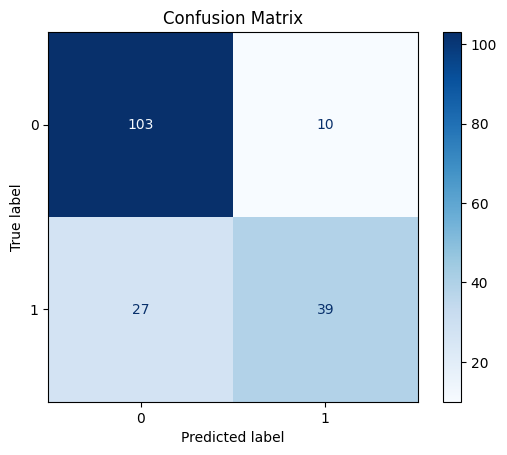

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_mapped, cmap='Blues', colorbar=True
)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
score = silhouette_score(x_test, kmeans.predict(x_test))
print("Silhouette Score:", score)

Silhouette Score: 0.3460762093594914
